In [5]:
import os
import sys
module_path = os.path.abspath(os.path.join('C:\\Users\\under\\Jupyter Projects\My Research\\Donor Charity Matching\\utilities'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
path_all = 'C:\\Users\\under\\Jupyter Projects\\My Research\\Donor Charity Matching\\data_donorschoose\\donorschoose_primary_subject.csv'

In [24]:
import pandas as pd
import numpy as np
import Normalized_Feature_Indicative_Score as NFIS
import TextPreprocessing as preprocesser
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Import CSV data
df_all = pd.read_csv(path_all)
# Merge all texts into one cell
df_all['all_texts'] = df_all['title'] + df_all['short_description'] + df_all['need_statement'] + df_all['essay']
# Clean data
df_all = df_all.dropna(subset=['all_texts'])
print("Number of rows in data =", df_all.shape[0])
print("Number of columns in data =", df_all.shape[1])
# Keep descriptions contain only between 2500 and 4000 characters
df_2540 = df_all[(2500 <= df_all['all_texts'].apply(len)) & (df_all['all_texts'].apply(len) < 4000)]
# Drop empty celss
print(df_2540.shape)
df_2540 = df_2540.dropna(subset=['grade_level'])
df_2540 = df_2540.dropna(subset=['poverty_level'])
df_2540 = df_2540.dropna(subset=['primary_focus_area'])
print(df_2540.shape)

C:\Users\under\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Number of rows in data = 1201597
Number of columns in data = 52
(229394, 52)
(229370, 52)


In [14]:
%autoreload 2
from sklearn.feature_extraction.text import CountVectorizer

X_texts = preprocesser.clean_corpora(df_2540['all_texts'], isLower=True, doesRemoveDigit=True, doesRemovePunc=True, doesRemoveStopWords=True, doesLemmatize=True)
vectorizer = CountVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,2), binary=True)
X = vectorizer.fit_transform(X_texts)

Column 0 : 56006
Column 1 : 135544
Column 2 : 6190
Column 3 : 31630
['high poverty' 'highest poverty' 'low poverty' 'moderate poverty']


C:\Users\under\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


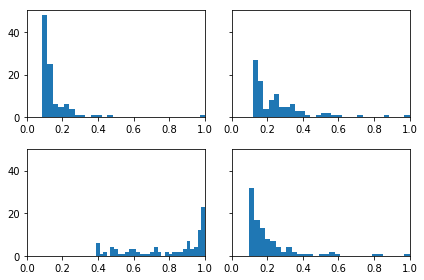

In [26]:
%autoreload 2
y = df_2540['poverty_level']
NFIS.plotScores(NFIS.getK_NFIS(X=X, y=y, k=100), row=2, col=2, bins=30)

Column 0 : 71351
Column 1 : 43769
Column 2 : 40748
Column 3 : 73502
['Grades 3-5' 'Grades 6-8' 'Grades 9-12' 'Grades PreK-2']


C:\Users\under\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


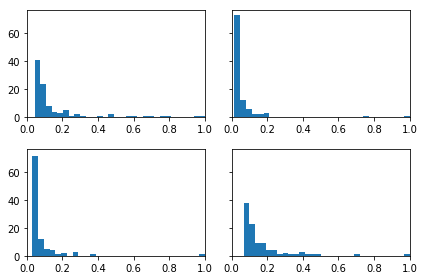

In [27]:
y = df_2540['grade_level']
NFIS.plotScores(NFIS.getK_NFIS(X=X, y=y, k=100), row=2, col=2, bins=30)

Column 0 : 15012
Column 1 : 9517
Column 2 : 11117
Column 3 : 91925
Column 4 : 64536
Column 5 : 20533
Column 6 : 16730
['Applied Learning' 'Health & Sports' 'History & Civics'
 'Literacy & Language' 'Math & Science' 'Music & The Arts' 'Special Needs']


C:\Users\under\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


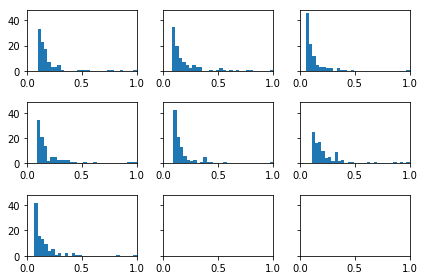

In [30]:
y = df_2540['primary_focus_area']
NFIS.plotScores(NFIS.getK_NFIS(X=X, y=y, k=100), row=3, col=3, bins=30)